# Homework 6

TFCB 2021

Due date: Nov 23, 2021 1PM

In this homework, we will work through a series of manipulations to analyze a published deep sequencing
dataset using `tidyverse` functions.

In the process, we will learn some new functions in `tidyverse` and apply
them to our data analysis.

For more information about the data used in this homework, see
[this page](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE89183).


In [124]:
library(tidyverse)

## Problem 1

**10 points**

For each of the following functions, provide a <100 character description
(in your own words) and a URL reference.

1. `!` ---   The `!` symbol means "is not" [link to source](https://cran.r-project.org/doc/manuals/r-release/R-intro.html#Simple-manipulations-numbers-and-vectors")

2. `is.na` ---  the `is.na` means "is the value NA" and returns a boolean [link to source](https://cran.r-project.org/doc/manuals/r-release/R-intro.html#Simple-manipulations-numbers-and-vectors")
3. `is.numeric` --- the `is.numeric` means "is the value a number" [link to source](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/numeric)
4. `anti_join` ---  function in tidyverse, means "return rows where there is not a match in a second table" used when joining tables [link to source](https://dplyr.tidyverse.org/reference/filter-joins.html)
5. `desc` --- tidyverse -- uses a vector and re-arranges to be in descending order [link to source](https://dplyr.tidyverse.org/reference/desc.html)
6. `dplyr::slice` --- function in tidyverse, used to select rowns by location in a tibble [link to source](https://dplyr.tidyverse.org/articles/base.html?q=slice#slice-choose-rows-by-position)
7. `dplyr::across` --- --tidyverse -- allows you to apply the same transformation to multiple columns [link to source](https://dplyr.tidyverse.org/reference/across.html?q=across)


## Problem 2

**10 points**

Add a comment above each code line below explaining what the code line does and/or why
that code line is necessary.

Keep each comment to less than 2 lines per line of code and < 80 chars per line.

In [172]:
# loads a tab separated sheet
annotations <- read_tsv("ftp://ftp.ebi.ac.uk/pub/databases/genenames/new/tsv/locus_groups/protein-coding_gene.txt") %>%
  # selects only the columns of interest
  select(ensembl_gene_id, symbol, name, gene_group, ccds_id) %>%
  # remove the rows where the ccds_id column is NA
  filter(!is.na(ccds_id)) %>%
  # print to console
  print()

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 19206 Columns: 54

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (38): hgnc_id, symbol, name, locus_group, locus_type, status, location,...
dbl   (4): entrez_id, omim_id, homeodb, orphanet
lgl   (8): mirbase, snornabase, imgt, kznf_gene_catalog, mamit-trnadb, lncrn...
date  (4): date_approved_reserved, date_symbol_changed, date_name_changed, d...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



# A tibble: 18,808 × 5
   ensembl_gene_id symbol  name             gene_group            ccds_id       
   <chr>           <chr>   <chr>            <chr>                 <chr>         
 1 ENSG00000121410 A1BG    alpha-1-B glyco… Immunoglobulin like … CCDS12976     
 2 ENSG00000148584 A1CF    APOBEC1 complem… RNA binding motif co… CCDS7242|CCDS…
 3 ENSG00000175899 A2M     alpha-2-macrogl… C3 and PZP like, alp… CCDS44827     
 4 ENSG00000166535 A2ML1   alpha-2-macrogl… C3 and PZP like, alp… CCDS73439|CCD…
 5 ENSG00000184389 A3GALT2 alpha 1,3-galac… Glycosyltransferase … CCDS60080     
 6 ENSG00000128274 A4GALT  alpha 1,4-galac… Alpha 1,4-glycosyltr… CCDS14041     
 7 ENSG00000118017 A4GNT   alpha-1,4-N-ace… Alpha 1,4-glycosyltr… CCDS3097      
 8 ENSG00000094914 AAAS    aladin WD repea… WD repeat domain con… CCDS8856|CCDS…
 9 ENSG00000081760 AACS    acetoacetyl-CoA… Acyl-CoA synthetase … CCDS9263      
10 ENSG00000114771 AADAC   arylacetamide d… Lipases|Arylacetamid… CCDS33877     
# … w

In [126]:
# loads a tab separated sheet 
data <- read_tsv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE89nnn/GSE89183/suppl/GSE89183_Counts.txt.gz") %>%
  # chnages the column name to eliminate the space
  rename(ensembl_gene_id = `ENSEMBL gene`) %>%
  #print to console
  print()

Rows: 63677 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ENSEMBL gene
dbl (14): CD34_shTSR2_RNA_1, CD34_shTSR2_RNA_2, CD34_shRPL5_RNA_1, CD34_shRP...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



# A tibble: 63,677 × 15
   ensembl_gene_id CD34_shTSR2_RNA_1 CD34_shTSR2_RNA_2 CD34_shRPL5_RNA_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000003                48                56                40
 2 ENSG00000000005                 0                 2                 0
 3 ENSG00000000419               880               744              1116
 4 ENSG00000000457               124               113               149
 5 ENSG00000000460               249               262               289
 6 ENSG00000000938                89                64               204
 7 ENSG00000000971               106                86               241
 8 ENSG00000001036               897               613              1487
 9 ENSG00000001084               965              1027              1036
10 ENSG00000001167               721               835               498
# … with 63,667 more rows, and 11 more variables: CD34_shRPL5_RNA_2 <dbl>,
#   CD34_shRPL5_RPF_1 <db

## Problem 3

**10 points**

Using the code below:

1. Convert both axes to `log10` instead of linear scales.
2. Show axis tick labels as 10^0^, 10^1^, 10^2^,10^3^, 10^4^, 10^5^ for both axes.
3. There are too many points overlapping in certain regions. Use a different
`geom_` function to convey to your reader how many overlapping points are present
in each region.

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 43031 rows containing non-finite values (stat_sum).”


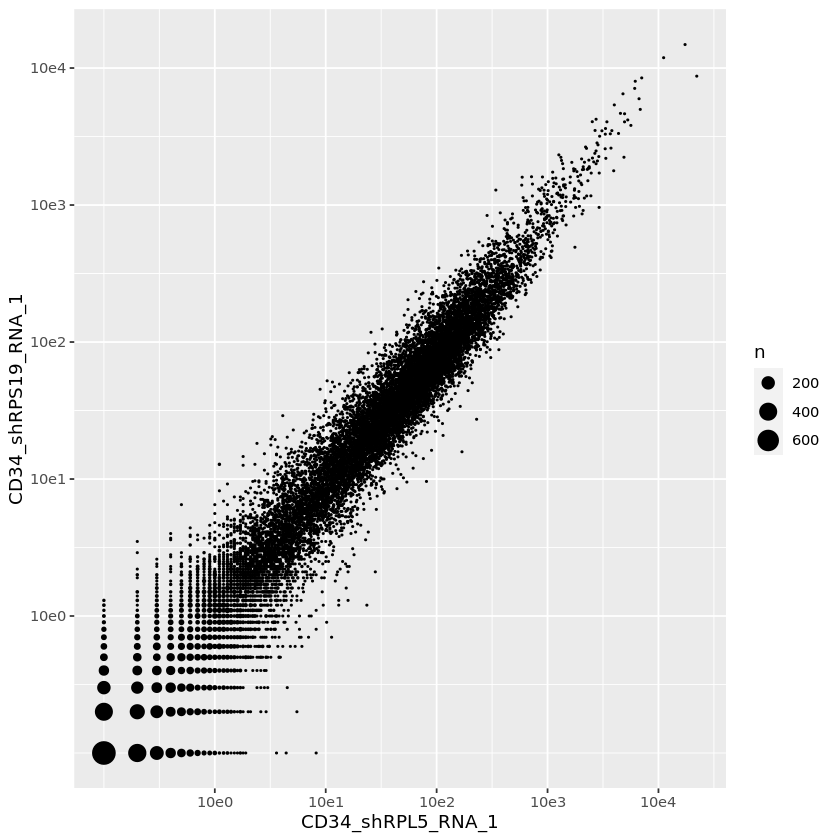

In [127]:
data %>%
  select(CD34_shRPL5_RNA_1, CD34_shRPS19_RNA_1) %>%
  ggplot(aes(x = CD34_shRPL5_RNA_1, y = CD34_shRPS19_RNA_1)) +
  scale_x_continuous(trans = 'log10', breaks=c(10e0, 10e1, 10e2, 10e3, 10e4, 10e5), labels=c('10e0', '10e1', '10e2', '10e3', '10e4', '10e5')) +
  scale_y_continuous(trans = 'log10', breaks=c(10e0, 10e1, 10e2, 10e3, 10e4, 10e5), labels=c('10e0', '10e1', '10e2', '10e3', '10e4', '10e5'))+
  geom_count() +
  scale_size_area()


**In problems 4 through 6, assign the result of your operation back to the `data`
variable.**

## Problem 4

**10 points**

Write a code cell to select the following columns from the `data` variable you created above and reassign back to `data`.

Columns to select: `ensembl_gene_id`, columns that have either `RPL5`, `RPS19`, or `Luc` in their name.

Instead of listing every column, use [`matches`](https://tidyselect.r-lib.org/reference/starts_with.html) and a succinct [regular expression](https://stringr.tidyverse.org/articles/regular-expressions.html) to select the above columns.

In [135]:
data <- data %>%
    select(.,ensembl_gene_id, matches(c("RPL5","RPS19","Luc")))

## Problem 5

**10 points**

Write a code cell to filter the result from Problem 4 to include only rows where each of the 12 numerical columns you selected has 50 counts or more  and reassign back to `data`.
This is a simple way to avoid genes that have very low counts.

You might be tempted to do this step separately for each of the 12 columns, but instead use the `across` function you learned above or the `pivot_longer` function from the class (either way is fine).

In [151]:
data <- data %>%
    filter(
        across(
            .cols = everything(),
            .fns = ~ .x >50
        )
    )

## Problem 6

**10 points**

Write a code cell to divide each of the 12 numerical columns by the
corresponding median value for each column
and reassign back to `data`. This median normalization is typically done in
high-throughput experiments after filtering
to normalize for sample-to-sample difference in read depth.

Again, you can write lot less code if you use the `mutate` and `across` function
you learned above.


In [156]:

data <- data %>%
    mutate(
        across(
            .cols = 2:13,
            .fns = ~ .x / median(.)
        )
    )

## Problem 7

**10 points**

After we do the above filtering and median-normalization, let us calculate
translation efficiency as the average ratio of the RPF and RNA reads for each
treatment condition. Then we calculate how this translation efficiency changes
between target (`rpl5` and `rps19`) and control (`luc`) shRNAs.

The code implementing the above steps is shown below, but it has a few
errors. Correct them.


In [157]:
lfc <- data %>%
  mutate(
      mean_rpl5_te = ((CD34_shRPL5_RPF_1 + CD34_shRPL5_RPF_2) /
                            (CD34_shRPL5_RNA_1 + CD34_shRPL5_RNA_2)),
      mean_rps19_te = ((CD34_shRPS19_RPF_1 + CD34_shRPS19_RPF_2) /
                            (CD34_shRPS19_RNA_1 + CD34_shRPS19_RNA_2)),
     mean_shluc_te = ((CD34_shLuc_RPF_1 + CD34_shLuc_RPF_2) /
                            (CD34_shLuc_RNA_1 + CD34_shLuc_RNA_2))) %>%

         select(ensembl_gene_id, mean_rpl5_te, mean_rps19_te, mean_shluc_te) %>%
            mutate(
                lfc_te_rpl5 = log2(mean_rpl5_te / mean_shluc_te),
                lfc_te_rps19 = log2(mean_rps19_te / mean_shluc_te))


## Problem 8

**10 points**

Write code that will create a new dataframe called `mean_lfc` from `lfc`
containing a new column called `avg_lfc`.
`avg_lfc` should be the average of the log2 fold-change in TE (`lfc_te`) upon
knockdown of RPL5 and RPS19.

Then select only the gene id column and the new column that you just created
(this will be your new dataframe `mean_lfc`).


In [215]:
mean_lfc <- lfc %>%
        mutate(
            avg_lfc = ((lfc_te_rpl5 + lfc_te_rps19)/2)) %>%
            select(ensembl_gene_id, avg_lfc)


## Problem 9

**10 points**

Write code to join the `mean_lfc` dataframe with the `annotations` dataframe created
at the top of the document and assign back to `mean_lfc`.


In [216]:
mean_lfc <- left_join(mean_lfc, annotations, by="ensembl_gene_id")
head(mean_lfc)

ensembl_gene_id,avg_lfc,symbol,name,gene_group,ccds_id
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
ENSG00000000419,0.1039537,DPM1,"dolichyl-phosphate mannosyltransferase subunit 1, catalytic",Glycosyltransferase family 2|Dolichyl-phosphate mannosyltransferase subunits,CCDS13434|CCDS82628
ENSG00000001036,-0.3619136,FUCA2,alpha-L-fucosidase 2,Alpha-L-fucosidases,CCDS5200
ENSG00000001084,0.3300414,GCLC,glutamate-cysteine ligase catalytic subunit,NA,CCDS75471|CCDS4952
ENSG00000001497,-0.5493425,LAS1L,LAS1 like ribosome biogenesis factor,Large ribosomal subunit biogenesis complex,CCDS55433|CCDS14381|CCDS55434
ENSG00000002549,0.2734944,LAP3,leucine aminopeptidase 3,Aminopeptidases,CCDS3422
ENSG00000002586,-0.4025630,CD99,CD99 molecule (Xg blood group),Blood group antigens|CD molecules|Pseudoautosomal region 1,CCDS75947|CCDS48071|CCDS83452|CCDS14119


## Problem 10

**10 points**

1. Write code to select only the bottom 10 genes with the lowest `avg_lfc` and display the gene `symbol`, gene `name` and `avg_lfc` for these genes.
2. Create a figure using `ggplot2` to visualize these results.

Write a few sentences to justify the choices you made when creating your figure.

In [217]:
# 1.

lowestfc <- mean_lfc %>%
    slice_min(. , order_by = avg_lfc, n =10) %>%
    select(symbol,name,avg_lfc)

print(lowestfc)

# A tibble: 10 × 3
   symbol name                                       avg_lfc
   <chr>  <chr>                                        <dbl>
 1 H2AC6  H2A clustered histone 6                      -2.96
 2 H2BC12 H2B clustered histone 12                     -2.80
 3 RPS15  ribosomal protein S15                        -2.28
 4 COX8A  cytochrome c oxidase subunit 8A              -2.03
 5 RPL18A ribosomal protein L18a                       -2.02
 6 RPLP1  ribosomal protein lateral stalk subunit P1   -2.02
 7 H2AX   H2A.X variant histone                        -1.87
 8 RPS26  ribosomal protein S26                        -1.85
 9 APOE   apolipoprotein E                             -1.69
10 RPL7A  ribosomal protein L7a                        -1.69


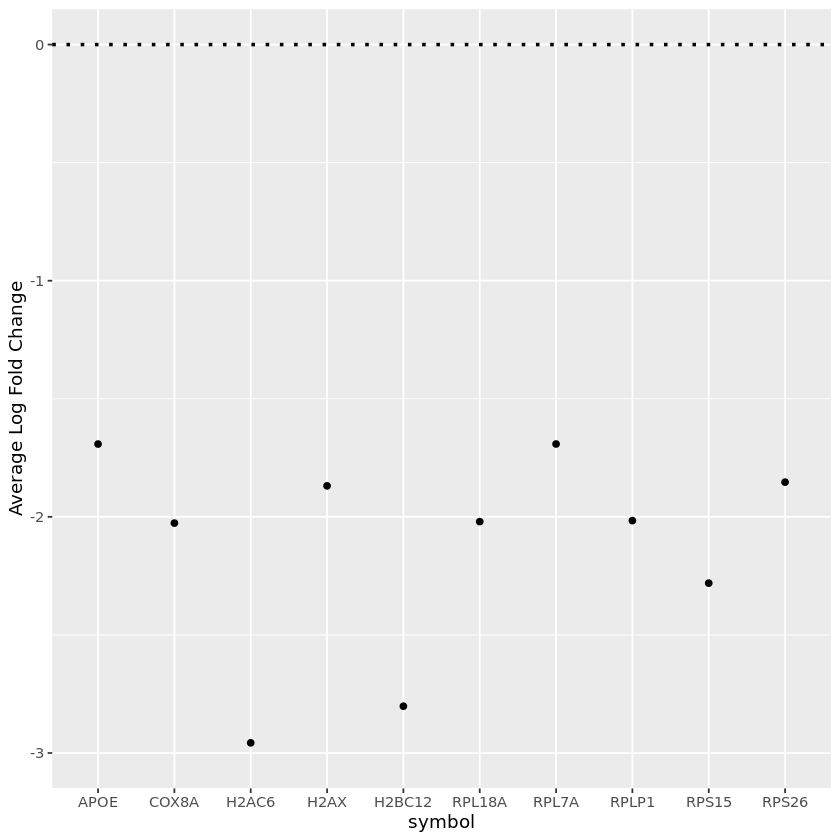

In [227]:
# 2.
    ggplot(lowestfc, aes(symbol,avg_lfc))+
    scale_y_continuous("Average Log Fold Change", limits=c(-3,0))+
    geom_point()+
    geom_hline(yintercept = 0, linetype="dotted", size = 1)

I made this figure to should the fold change alues relative to 0. The 0 is the top of the y acxis limit. Each gene has it's own column where a point is plotted. I did not want to do a different type of plot because we have no additional information to show relationships between points, confidence intervales, p-values etc.  I added a horizontal line at 0 to emphasize these are negative values.